In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import soccerdata as sd
from pathlib import PosixPath
import pandas as pd
import numpy as np

import os
import cProfile
from tqdm import tqdm

[04/15/24 15:42:39] INFO     Custom team name replacements loaded from                                ]8;id=23160;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=399749;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_config.py#85\85]8;;\
                             /home/morten/soccerdata/config/teamname_replacements.json.                            

                    INFO     Custom league dict loaded from                                          ]8;id=343687;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=384417;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_config.py#163\163]8;;\
                             /home/morten/soccerdata/config/league_dict.json.                                      

In [3]:
ws = sd.WhoScored(
    #  "GER-Bundesliga", "GER-Bundesliga2", "ENG-Premier League", "ESP-La Liga", "FRA-Ligue 1", "ITA-Serie A"
    leagues=["GER-Bundesliga2", "GER-Bundesliga", "ENG-Premier League"],
    seasons=[21],
    no_cache=False,
    no_store=False,
    data_dir=PosixPath("/home/morten/Develop/Open-Data/soccerdata"),
    path_to_browser="/usr/bin/chromium",
    headless=True,
)

                    INFO     Saving cached data to /home/morten/Develop/Open-Data/soccerdata          ]8;id=277122;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=724682;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_common.py#91\91]8;;\

Starting ChromeDriver in headless mode. 4.11.2


[04/15/24 15:42:40] INFO     patching driver executable                                              ]8;id=838022;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/undetected_chromedriver/patcher.py\patcher.py]8;;\:]8;id=978320;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/undetected_chromedriver/patcher.py#346\346]8;;\
                             /home/morten/.local/share/undetected_chromedriver/undetected_chromedriv               
                             er                                                                                    

In [4]:
schedule = ws.read_schedule().reset_index()
test_game = schedule["game_id"].values[0]
test_date = schedule[schedule["game_id"] == test_game]["date"].values[0]

[04/15/24 15:42:41] INFO     Retrieving game schedule of GER-Bundesliga2 - 2122 from the cache     ]8;id=480552;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=889626;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of GER-Bundesliga - 2122 from the cache      ]8;id=463089;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=458615;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/whoscored.py#437\437]8;;\

                    INFO     Retrieving game schedule of ENG-Premier League - 2122 from the cache  ]8;id=547536;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=44782;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/whoscored.py#437\437]8;;\

In [5]:
schedule

,league,season,game,date,home_team,away_team,game_id,url,stage
0,ENG-Premier League,2122,2021-08-13 Brentford-Arsenal,2021-08-13 20:00:00,Brentford,Arsenal,1549539,https://www.whoscored.com/Matches/1549539/Live...,NaN
1,ENG-Premier League,2122,2021-08-14 Burnley-Brighton,2021-08-14 15:00:00,Burnley,Brighton,1549540,https://www.whoscored.com/Matches/1549540/Live...,NaN
2,ENG-Premier League,2122,2021-08-14 Chelsea-Crystal Palace,2021-08-14 15:00:00,Chelsea,Crystal Palace,1549541,https://www.whoscored.com/Matches/1549541/Live...,NaN
3,ENG-Premier League,2122,2021-08-14 Everton-Southampton,2021-08-14 15:00:00,Everton,Southampton,1549542,https://www.whoscored.com/Matches/1549542/Live...,NaN
4,ENG-Premier League,2122,2021-08-14 Leicester-Wolves,2021-08-14 15:00:00,Leicester,Wolves,1549543,https://www.whoscored.com/Matches/1549543/Live...,NaN
...,...,...,...,...,...,...,...,...,...
987,GER-Bundesliga2,2122,2022-05-15 Hansa Rostock-Hamburg,2022-05-15 14:30:00,Hansa Rostock,Hamburg,1557935,https://www.whoscored.com/Matches/1557935/Live...,NaN
988,GER-Bundesliga2,2122,2022-05-15 Nuernberg-Schalke,2022-05-15 14:30:00,Nuernberg,Schalke,1557927,https://www.whoscored.com/Matches/1557927/Live...,NaN
989,GER-Bundesliga2,2122,2022-05-15 Sandhausen-Holstein Kiel,2022-05-15 14:30:00,Sandhausen,Holstein Kiel,1557929,https://www.whoscored.com/Matches/1557929/Live...,NaN
990,GER-Bundesliga2,2122,2022-05-15 St. Pauli-Fortuna Duesseldorf,2022-05-15 14:30:00,St. Pauli,Fortuna Duesseldorf,1557926,https://www.whoscored.com/Matches/1557926/Live...,NaN


---

In [6]:
# get dataset
import gde.database_io.dims
import gde.database_io.faks

from sqlalchemy import create_engine
from sqlalchemy.orm import Session

test_game = 1557933
db_path = "/home/morten/Develop/packing-report/gde/GDE.db"

engine = create_engine(f'sqlite:///{db_path}', echo=False)
session = Session(engine)


from sqlalchemy import func

from sqlalchemy import func
from sqlalchemy.orm import aliased

# Subquery for result_table
ranked_subquery = (
    session.query(
        gde.database_io.dims.Games.game_id,
        gde.database_io.dims.Games.team_id,
        gde.database_io.dims.Games.result,
        func.row_number().over(
            partition_by=(gde.database_io.dims.Games.game_id, gde.database_io.dims.Games.team_id),
            order_by=func.count().desc()
        ).label('rank')
    )
    .filter(gde.database_io.dims.Games.game_date > '2018-06-01')
    .group_by(gde.database_io.dims.Games.game_id, gde.database_io.dims.Games.team_id, gde.database_io.dims.Games.result)
    .subquery()
)

result_table = (
    session.query(ranked_subquery.c.game_id, ranked_subquery.c.team_id, ranked_subquery.c.result)
    .filter(ranked_subquery.c.rank == 1)
    .subquery()
)

# Subquery for elo_table
elo_table = (
    session.query(
        func.avg(gde.database_io.dims.Games.elo).label('avg_elo'),
        gde.database_io.dims.Games.team_id,
        gde.database_io.dims.Games.game_id
    )
    .filter(gde.database_io.dims.Games.game_date > '2018-06-01')
    .group_by(gde.database_io.dims.Games.game_id, gde.database_io.dims.Games.team_id)
    .subquery()
)

# Joining the subqueries
query = (
    session.query(
        result_table.c.game_id,
        result_table.c.team_id,
        result_table.c.result,
        elo_table.c.avg_elo
    )
    .join(elo_table, 
          (result_table.c.game_id == elo_table.c.game_id) & 
          (result_table.c.team_id == elo_table.c.team_id))
)

results = query.all()

In [7]:
# get dataset
import gde.database_io.dims
import gde.database_io.faks

from sqlalchemy import create_engine
from sqlalchemy.orm import Session

test_game = 1557933
db_path = "/home/morten/Develop/packing-report/gde/GDE.db"

engine = create_engine(f'sqlite:///{db_path}', echo=False)
session = Session(engine)


from sqlalchemy import func

from sqlalchemy import func
from sqlalchemy.orm import aliased

# Subquery for result_table
ranked_subquery = (
    session.query(
        gde.database_io.dims.Games.game_id,
        gde.database_io.dims.Games.team_id,
        gde.database_io.dims.Games.result,
        func.row_number().over(
            partition_by=(gde.database_io.dims.Games.game_id, gde.database_io.dims.Games.team_id),
            order_by=func.count().desc()
        ).label('rank')
    )
    .filter(gde.database_io.dims.Games.game_date > '2018-06-01')
    .group_by(gde.database_io.dims.Games.game_id, gde.database_io.dims.Games.team_id, gde.database_io.dims.Games.result)
    .subquery()
)

result_table = (
    session.query(ranked_subquery.c.game_id, ranked_subquery.c.team_id, ranked_subquery.c.result)
    .filter(ranked_subquery.c.rank == 1)
    .subquery()
)

# Subquery for elo_table
elo_table = (
    session.query(
        func.avg(gde.database_io.dims.Games.elo).label('avg_elo'),
        gde.database_io.dims.Games.team_id,
        gde.database_io.dims.Games.game_id
    )
    .filter(gde.database_io.dims.Games.game_date > '2018-06-01')
    .group_by(gde.database_io.dims.Games.game_id, gde.database_io.dims.Games.team_id)
    .subquery()
)

# Joining the subqueries
query = (
    session.query(
        result_table.c.game_id,
        result_table.c.team_id,
        result_table.c.result,
        elo_table.c.avg_elo
    )
    .join(elo_table, 
          (result_table.c.game_id == elo_table.c.game_id) & 
          (result_table.c.team_id == elo_table.c.team_id))
)

results = query.all()

In [8]:
pred_data = pd.DataFrame(np.array(results), columns=["game_id", "team_id", "result", "avg_elo"])

In [9]:
pred_data = pd.merge(pred_data, pred_data, how="outer", on="game_id")
pred_data = pred_data.loc[pred_data["team_id_x"] != pred_data["team_id_y"]]

In [10]:
pred_data

,game_id,team_id_x,result_x,avg_elo_x,team_id_y,result_y,avg_elo_y
1,1284741,13,0-2,1677.830899590683,167,2-0,1783.4196140697197
2,1284741,167,2-0,1783.4196140697197,13,0-2,1677.830899590683
5,1284742,183,2-0,1586.3552555059664,188,0-2,1634.3047179959779
6,1284742,188,0-2,1634.3047179959779,183,2-0,1586.3552555059664
9,1284743,162,2-0,1639.4586207791006,170,0-2,1632.5093618528822
...,...,...,...,...,...,...,...
15862,1557933,1143,0-2,1396.6065768806927,42,2-0,1532.7550982487717
15865,1557934,813,1-0,1359.969797227893,1731,0-1,1398.383707205254
15866,1557934,1731,0-1,1398.383707205254,813,1-0,1359.969797227893
15869,1557935,38,3-2,1519.9140369773688,48,2-3,1427.558122043461


In [11]:
pred_data["elo_diff"] = pred_data["avg_elo_x"].astype(float) - pred_data["avg_elo_y"].astype(float)
pred_data["result_diff"] = pred_data["result_x"].apply(lambda x: int(x.split("-")[0]) - int(x.split("-")[1]))

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

((array([-3.75307776, -3.52467813, -3.39913145, ...,  3.39913145,
          3.52467813,  3.75307776]),
  array([-8, -8, -7, ...,  7,  8,  8])),
 (1.843173379413444, 0.0007560483870967742, 0.9850318523133272))

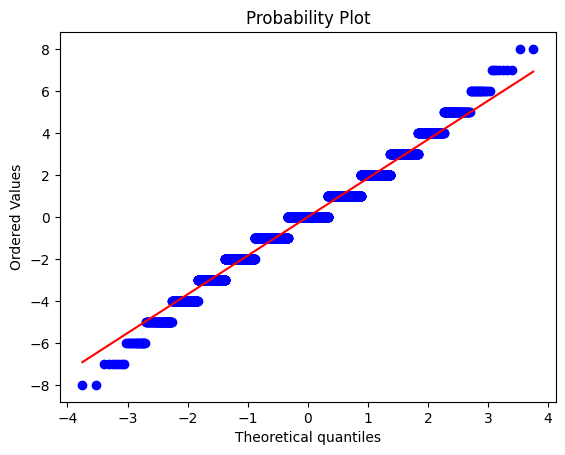

In [13]:
#sns.distplot(pred_data["result_diff"])
stats.probplot(pred_data["result_diff"], plot=plt)

In [14]:
import plotly.express as px

# feat = np.log1p(pred_data["result_diff"])

px.scatter(pred_data, x="result_diff", y="elo_diff")

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X=pred_data["elo_diff"].values.reshape(-1, 1), y=pred_data["result_diff"])

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.predict([[1676.1701826960673 - 1780.7405858122504]])

In [ ]:
pred_data = pred_data.groupby('game_id').first().reset_index()

In [ ]:
pred_data

In [ ]:
pred_data["prediction"] = pred_data.apply(lambda x: lr.predict([[x["elo_diff"]]])[0], axis=1)

In [ ]:
pred_data

In [ ]:
#sns.distplot(pred_data["result_diff"])
stats.probplot(pred_data["result_diff"], plot=plt)

In [ ]:
np.mean((pred_data["result_diff"] - pred_data["prediction"])**2)